# Formulation of the CVRP as programmed in my Master's Thesis

Packages importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import pandas as pd

Data importation:

In [2]:
c = np.loadtxt("dist.txt")
## Distance matrix adds a cost to use the first arc so the use of a vehicle is included

Some important parameters

In [3]:
# Number of vehicles
Vehic = 6

# Number of clients
Clients = 12

# Big M
M = 100

# Total days
Days = 5

Sets

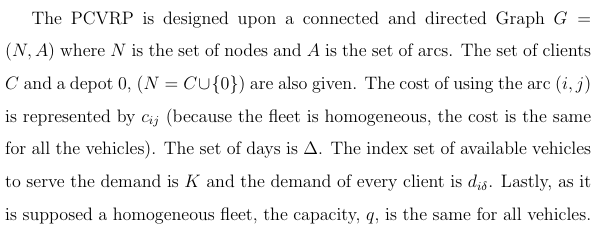

In [4]:
N = [i for i in range(Clients+1)] # Set of nodes
C = [i for i in range(1,Clients+1)]
A = [(i,j) for i in N for j in N]
K = [i for i in range(1, Vehic+1)]
Delta = [i for i in range(1, Days+1)]

Getting the demand of each customer every day

In [5]:
demand = np.loadtxt("demand.txt")
d = {(i,j): demand[i,j-1] for i in C for j in Delta}

Final parameter, the capacity of the vehicle

In [6]:
q = 20

In [7]:
# Call the model
m = Model("PVRP")
m.setParam("TimeLimit",60)

Academic license - for non-commercial use only - expires 2021-04-09
Using license file C:\Users\57316\gurobi.lic
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf


Variables:

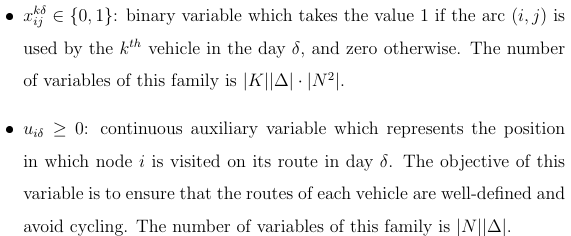

In [8]:
x = m.addVars(A,K,Delta,vtype=GRB.BINARY,name="x")
u = m.addVars(N,Delta, vtype=GRB.CONTINUOUS,lb=0,ub=Clients+1,name="u")

Objective function

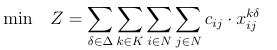

In [9]:
m.modelSense = GRB.MINIMIZE
m.setObjective(quicksum(c[i,j]*x[i,j,k,delta] for i,j in A for k in K for delta in Delta))

## Constraints
Every client must be visited once everyday

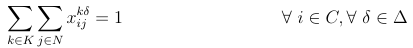

In [10]:
m.addConstrs(quicksum(x[i,j,k,delta] for k in K for j in N)==1 for i in C for delta in Delta);

The demand served by a vehicle must be less than its capacity

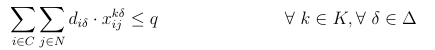

In [11]:
m.addConstrs(quicksum(d[i,delta]*x[i,j,k,delta] for i in C for j in N)<=q for k in K for delta in Delta);

Vehicles must get start the route at the depot and finish it there

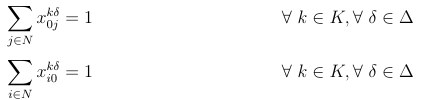

In [12]:
m.addConstrs(quicksum(x[0,j,k,delta] for j in N)==1 for k in K for delta in Delta);
m.addConstrs(quicksum(x[i,0,k,delta] for i in N)==1 for k in K for delta in Delta);

Flow constraint

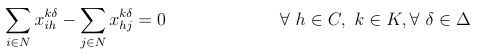

In [13]:
m.addConstrs(quicksum(x[i,h,k,delta] for i in N)-quicksum(x[h,j,k,delta] for j in N)==0 for k in K for h in C
             for delta in Delta);

Subcircuit elimination

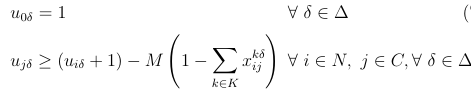

In [14]:
m.addConstrs(u[0,delta]==1 for delta in Delta);
m.addConstrs(u[j,delta]>=(u[i,delta]+1)-M*(1-quicksum(x[i,j,k,delta] for k in K)) for i in N for j in C
            for delta in Delta);

In [15]:
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1295 rows, 5135 columns and 24905 nonzeros
Model fingerprint: 0x9818e62a
Variable types: 65 continuous, 5070 integer (5070 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [9e+00, 2e+03]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+02]
Presolve removed 65 rows and 365 columns
Presolve time: 0.75s
Presolved: 1230 rows, 4770 columns, 23760 nonzeros
Variable types: 60 continuous, 4710 integer (4710 binary)

Root relaxation: objective 8.849050e+03, 1501 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 8849.05000    0  135          - 8849.05000      -     -    0s
H    0     0                    62995.100000 8849.05000  86.0%     -    0s
H    0     

In [17]:
m.printAttr("X")


    Variable            X 
-------------------------
  x[0,0,1,4]            1 
  x[0,0,1,5]            1 
  x[0,0,2,1]            1 
  x[0,0,2,2]            1 
  x[0,0,2,4]            1 
  x[0,0,3,1]            1 
  x[0,0,4,2]            1 
  x[0,0,4,3]            1 
  x[0,0,4,4]            1 
  x[0,0,4,5]            1 
  x[0,0,5,3]            1 
  x[0,0,6,1]            1 
  x[0,0,6,3]            1 
  x[0,2,6,4]     0.999999 
  x[0,2,6,5]     0.999998 
  x[0,3,2,5]     0.999999 
  x[0,4,2,3]            1 
  x[0,6,1,3]            1 
  x[0,6,4,1]     0.999999 
  x[0,6,6,2]     0.999999 
  x[0,7,1,2]            1 
  x[0,7,3,4]     0.999999 
  x[0,7,3,5]            1 
  x[0,8,1,1]            1 
  x[0,8,3,2]            1 
  x[0,8,5,4]            1 
  x[0,8,5,5]            1 
 x[0,12,3,3]            1 
 x[0,12,5,1]            1 
 x[0,12,5,2]            1 
  x[1,2,1,2]            1 
  x[1,2,5,1]            1 
  x[1,5,6,4]     0.999999 
  x[1,5,6,5]            1 
  x[1,7,1,3]            1 
 